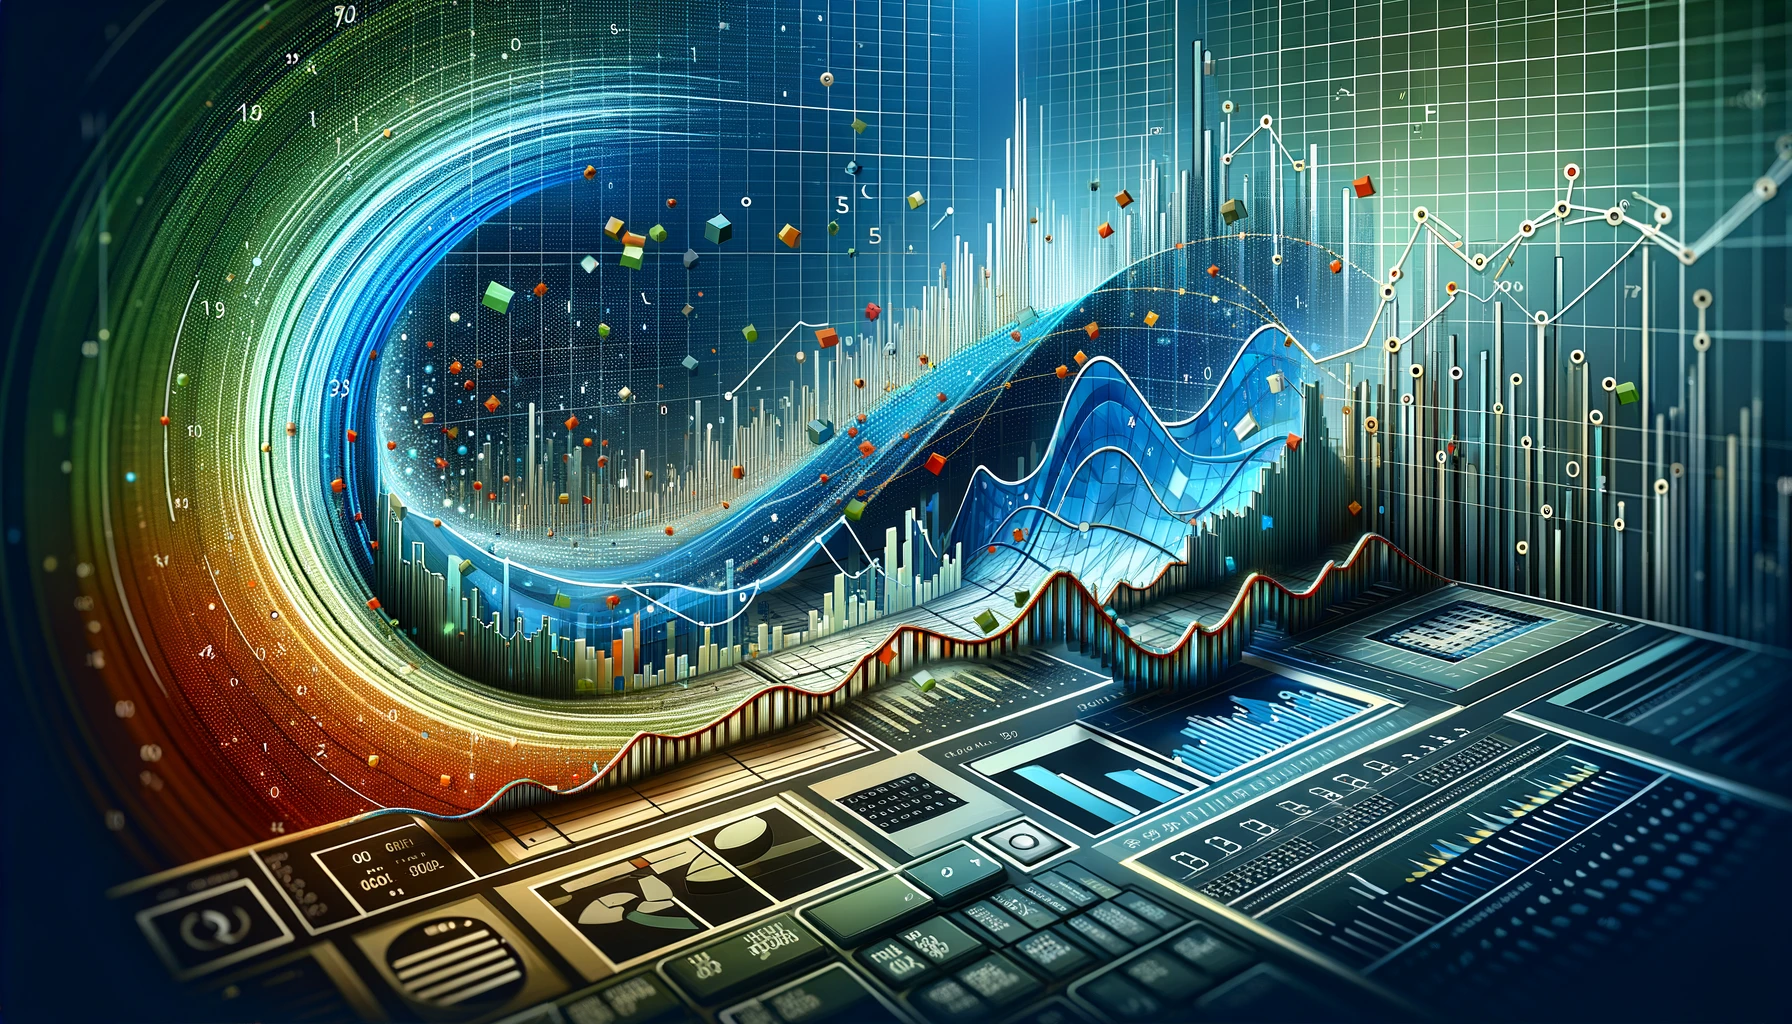

# **1. Introducao**

# Este notebook tem como objetivo realizar uma Análise exploratória de dados (EDA) em um conjunto de dados disponivel no Kaggle sobre os salarios da área de Ciência de dados entre os anos de 2020-2024, faz parte de um competição realizada dentro da comunidade do "Clube de Assinaturas da Universidade dos dados" ministrado pelo Andre Yukio.

# O objetivo desta EDA é proporcionar uma compreensão mais aprofundada da estrutura de remuneração no campo de Data Science, identificando padrões e possíveis disparidades. Esta análise não apenas beneficia os profissionais atuais e aspirantes a entenderem o panorama salarial, mas também empregadores no planejamento de orçamentos de contratação e no estabelecimento de pacotes de remuneração competitivos.


# **2. Dicionario dos Dados**


## **Colunas e Descrição** :
<br>

## **job_title: The job title or role associated with the reported salary.**

## **experience_level: The level of experience of the individual.**

## **employment_type: Indicates whether the employment is full-time, part-time, etc.**

## **work_models: Describes different working models (remote, on-site, hybrid).**

## **work_year: The specific year in which the salary information was recorded.**

## **employee_residence: The residence location of the employee.**

## **salary: The reported salary in the original currency.**

## **salary_currency: The currency in which the salary is denominated.**

## **salary_in_usd: The converted salary in US dollars.**

## **company_location: The geographic location of the employing organization.**

## **company_size: The size of the company, categorized by the number of employees.**

<br>


## Fonte dos Dados: https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data

# **3. Importando Bibliotecas** 

In [1]:
%pip install pycountry 
import pycountry

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

#Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


# **4. Primeira olhada nos Dados e seu Shape**

In [2]:
salario=pd.read_csv('data_science_salaries.csv')

print(salario.shape)

print(f'É um conjunto de dados de {salario.shape[0]} Linhas e {salario.shape[1]} Colunas')

(6599, 11)
É um conjunto de dados de 6599 Linhas e 11 Colunas


In [3]:
# 5 Primeiras Linhas
salario.head()

job_title experience_level employment_type work_models  work_year  \
0   Data Engineer        Mid-level       Full-time      Remote       2024   
1   Data Engineer        Mid-level       Full-time      Remote       2024   
2  Data Scientist     Senior-level       Full-time      Remote       2024   
3  Data Scientist     Senior-level       Full-time      Remote       2024   
4    BI Developer        Mid-level       Full-time     On-site       2024   

  employee_residence  salary salary_currency  salary_in_usd company_location  \
0      United States  148100             USD         148100    United States   
1      United States   98700             USD          98700    United States   
2      United States  140032             USD         140032    United States   
3      United States  100022             USD         100022    United States   
4      United States  120000             USD         120000    United States   

  company_size  
0       Medium  
1       Medium  
2       Medium  
3       Medium  
4       Medium

In [4]:
#Colunas disponiveis no dataset
salario.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

# **5. Existem valores ausentes ? os dados estão no formato correto ?**

In [5]:
salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


# Não temos valores ausentes e os tipos dos dados estão corretos

# **6. Existem Valores Duplicados ?**

In [6]:
salario.duplicated().sum()


0

# Não temos valores duplicados

# **7. Como é o comportamento das Variáveis Numéricas ?**



In [7]:
#Para mostrar todos os números como floats sem notação científica
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Por conta dos valores altos na coluna "salary", é necessário fazer uma alteração no formato de apresentação dos valores numéricos; caso contrário, eles seriam representados como notação científica.

In [8]:
salario.describe(percentiles=[0.25,0.5,0.75,0.90,0.99])

work_year          salary  salary_in_usd
count 6599.000000     6599.000000    6599.000000
mean  2022.818457   179283.255493  145560.558569
std      0.674809   526372.242325   70946.838070
min   2020.000000    14000.000000   15000.000000
25%   2023.000000    96000.000000   95000.000000
50%   2023.000000   140000.000000  138666.000000
75%   2023.000000   187500.000000  185000.000000
90%   2023.000000   240070.000000  235000.000000
99%   2024.000000   750000.000000  345012.000000
max   2024.000000 30400000.000000  750000.000000

# Um desvio padrão tão alto na coluna "salary" é explicado pela variação do valor das moedas de cada local onde reside o empregado.



In [9]:
salario.query('salary==30400000')

job_title experience_level employment_type work_models  work_year  \
6504  Data Scientist        Mid-level       Full-time      Remote       2021   

     employee_residence    salary salary_currency  salary_in_usd  \
6504              Chile  30400000             CLP          40038   

     company_location company_size  
6504            Chile        Large

# Como por exemplo a pessoa que tem o maior valor de "salary" tem um valor de "30400000 CLP" (moeda do chile)  é um valor que corresponde a "40038 USD" que em "salary_in_usd" se encotra em um quantile abaixo de 25%, ou seja, existem mais de 85% de valores mais altos que este salario.

# **8. Agora vamos os valores não numéricos**

In [10]:
salario.describe(exclude=np.number)

job_title experience_level employment_type work_models  \
count            6599             6599            6599        6599   
unique            132                4               4           3   
top     Data Engineer     Senior-level       Full-time     On-site   
freq             1307             4105            6552        3813   

       employee_residence salary_currency company_location company_size  
count                6599            6599             6599         6599  
unique                 87              22               75            3  
top         United States             USD    United States       Medium  
freq                 5305            5827             5354         5860



# Neste dataset, como podemos ver, 6552 de 6599 são empregados Full-Time. Então, dos 4 tipos de modalidade de trabalho, como pode ser visto pela linha "unique", que representa a quantidade de categorias, a grande maioria é empregado "Full-Time".
# Algumas outras observações que temos é que neste dataset a maioria das pessoas são dos Estados Unidos, recebem em dólar e a maioria das empresas são de porte médio.
# Além do que já foi dito, existem muitas categorias de "Job_Title"; seria bom verificar se existem algumas categorias iguais ou com erros de digitação, ou podemos tentar uma abordagem mais geral, agrupando categorias da mesma área de atuação no ramo de ciência de dados.

In [11]:
profissoes=salario['job_title'].unique()
profissoes

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

# Para melhor visualização geral das áreas de ciência de dados, vamos agrupar as grandes áreas como "Data Analyst", "Data Scientist", "Data Engineer", "Machine Learning" e "Business Intelligence".
# Contudo, é importante notar que as fronteiras entre essas categorias podem ser fluidas, com muitos papéis abrangendo múltiplas áreas ou mudando de foco com base nas necessidades organizacionais e no desenvolvimento tecnológico.

In [12]:
# Cargos relacionados com analise de dados
dados_analista=['Data Analyst', 'Research Analyst', 'Business Data Analyst', 'Financial Data Analyst', 'Compliance Data Analyst', 
                'Product Data Analyst', 'Finance Data Analyst', 'Insight Analyst', 'Marketing Data Analyst', 'Sales Data Analyst', 
                'Data Analytics Specialist', 'Data Quality Analyst', 'Data Strategy Manager', 'Data Operations Analyst', 
                'Decision Scientist', 'Data Visualization Specialist', 'Data Visualization Engineer', 'Data Visualization Analyst',
               'Principal Data Analyst','Staff Data Analyst','Data Analyst Lead','Lead Data Analyst','Data Analytics Manager',
               'Data Analytics Consultant','Data Analytics Lead','Data Strategist']

#Cargos relacionados com ciencia de dados 
dados_cientistas=['Data Scientist', 'Director of Data Science', 'Data Science Manager', 'Applied Scientist', 
                  'Research Scientist', 'Managing Director Data Science', 'Data Science Practitioner', 
                  'Data Science Consultant', 'Data Science Engineer', 'Data Science Lead', 'Data Science Director', 
                  'Head of Data', 'Principal Data Scientist', 'Head of Data Science', 'Marketing Data Scientist', 
                  'Data Scientist Lead', 'Staff Data Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Data Science Tech Lead',
                 'Data Science','Analytics Engineering Manager']
# Cargos relacionados com engenharia de dados
eng_dados=['Data Quality Engineer','Data Engineer', 'Analytics Engineer', 'Data Architect', 'ETL Developer', 'Data Lead', 'Data Developer', 
           'Data Modeler', 'Data Integration Engineer', 'Data Management Analyst', 'Data Integration Specialist', 
           'Data Management Specialist', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Data Operations Engineer', 
           'Cloud Database Engineer', 'Big Data Engineer', 'Azure Data Engineer', 'Lead Data Engineer', 'Data DevOps Engineer', 
           'Principal Data Engineer', 'Consultant Data Engineer', 'Data Engineer Lead', 'Cloud Data Engineer', 
           'AWS Data Architect', 'Cloud Data Architect','Marketing Data Engineer','Data Modeller','Analytics Engineer Manager','ETL Engineer',
          'Data Analyst Engineer','Data Quality Manager','Data Manager','Data Operations Manager','Principal Data Architect','Big Data Architect',
          'Data Analytics Engineer','Data Operations Specialist']

# Cargos relacionados com Machine Learning!
ml=['Machine Learning Engineer', 'MLOps Engineer', 'Machine Learning Scientist', 'ML Engineer',
    'AI Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Operations Engineer', 'NLP Engineer', 
    'Machine Learning Researcher', 'Machine Learning Modeler', 'Machine Learning Software Engineer', 'Head of Machine Learning', 
    'Machine Learning Manager', 'AI Research Engineer', 'Deep Learning Engineer', 'Applied Machine Learning Engineer', 
    'Machine Learning Research Engineer', 'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer', 
    'Machine Learning Specialist', 'Machine Learning Developer', 'Deep Learning Researcher', 'Principal Machine Learning Engineer',
   'Staff Machine Learning Engineer','AI Architect','Prompt Engineer','Computer Vision Engineer','AI Developer','AI Scientist','AI Product Manager',
   'AI Programmer', 'Applied Machine Learning Scientist','Autonomous Vehicle Technician','Computer Vision Software Engineer']

#Cargos Relacionados com Business Intelligence!
bi=['BI Developer', 'Business Intelligence Developer', 'Business Intelligence Analyst', 
    'Business Intelligence Engineer', 'BI Analyst', 'Business Intelligence Specialist', 
    'BI Data Analyst', 'Business Intelligence Data Analyst', 'Power BI Developer', 'Business Intelligence Manager','BI Data Engineer','Manager Data Management','Data Product Manager',
   'Data Product Owner']


In [13]:
# Função que realização a reclassificação dos cargos para cargos mais amplos!
def reclassify_job_title(title):
    if title in dados_cientistas:
        return 'Data Scientist'
    elif title in dados_analista:
        return 'Data Analytics'
    elif title in eng_dados:
        return 'Data Engineer'
    elif title in ml:
        return 'Machine Learning'
    elif title in bi:
        return 'Business Intelligence'
    else:
        return title

salario_agrupado=salario.copy()
salario_agrupado['job_title'] = salario['job_title'].apply(reclassify_job_title)


# **9. Análise Univariada**


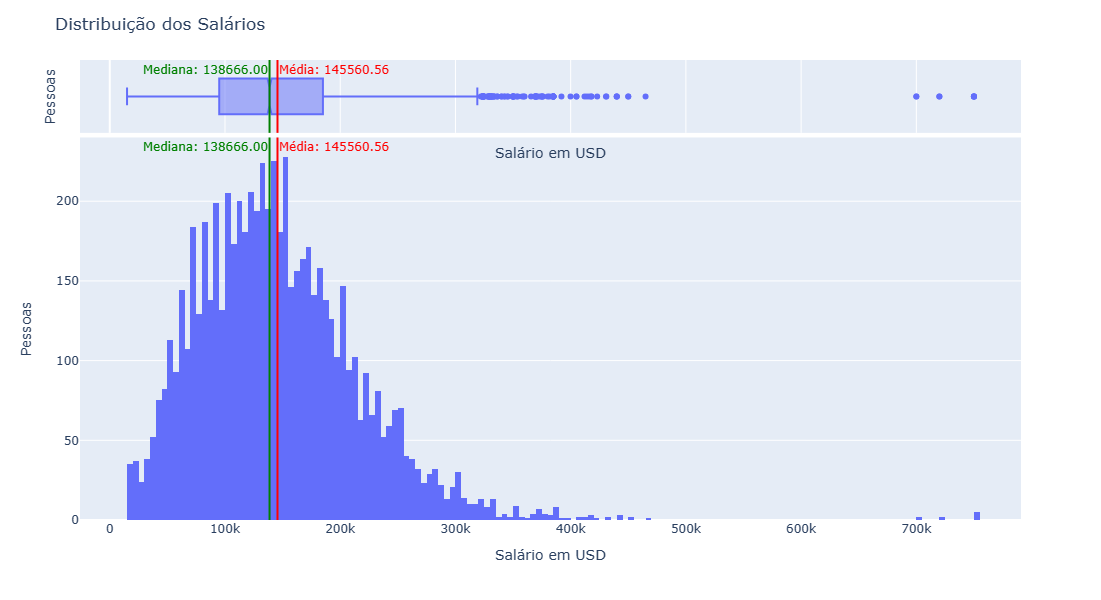

In [14]:
media = salario['salary_in_usd'].mean()
mediana = salario['salary_in_usd'].median()


fig = px.histogram(salario, x='salary_in_usd', marginal='box')

fig.update_yaxes(title_text='Pessoas')

fig.update_xaxes(title_text='Salário em USD')

# Adicione linhas verticais para média e mediana
# Adicionar linha vertical para a mediana com anotação à esquerda e direita para a media
fig.add_vline(x=media, line_color='red', 
              annotation_text=f'Média: {media:.2f}', 
              annotation_position='top right', 
              annotation_font_color='red')


fig.add_vline(x=mediana, line_color='green', 
              annotation_text=f'Mediana: {mediana:.2f}', 
              annotation_position='top left', 
              annotation_font_color='green')


fig.update_layout(title_text='Distribuição dos Salários', height=600)

# Mostre o gráfico
fig.show()



# O gráfico acima representa a distribuição dos salários em dólares, com uma distribuição assimétrica para a direita devido aos outliers (valores discrepantes), que podem ser observados no gráfico boxplot. Isso faz com que a média seja "aumentada".
# A existência de outliers pode ser explicada pela existência de setores que pagam mais, pela posição e experiência do empregado, além da localização geográfica do empregado.

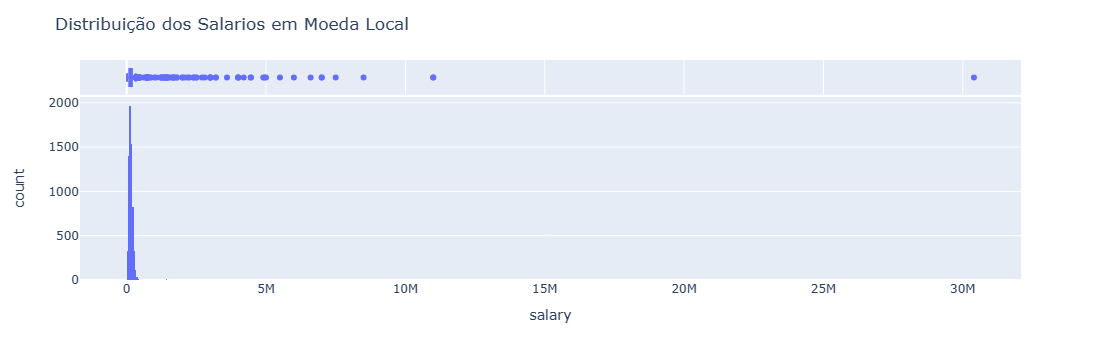

In [15]:
fig = px.histogram(salario, x="salary",marginal="box")

fig.update_layout(title_text='Distribuição dos Salarios em Moeda Local')
fig.show()


# Como já era esperado, devido às características da coluna "salary", a distribuição tem uma cauda longa para a direita, indicando que há valores de salários muito maiores que a média, o que aumenta o desvio padrão, como foi visto anteriormente.

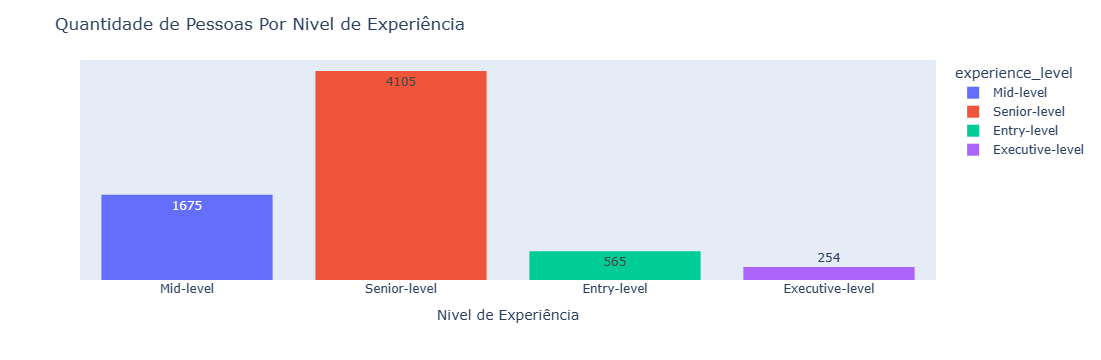

In [16]:

fig = px.histogram(salario, x="experience_level", color="experience_level")

fig.update_traces(texttemplate='%{y}', textposition='auto')

fig.update_yaxes(visible=False, showticklabels=False)

fig.update_xaxes(title_text='Nivel de Experiência')

fig.update_layout(title_text='Quantidade de Pessoas Por Nivel de Experiência')


fig.show()

# O gráfico sugere que há uma distribuição de talentos inclinada para profissionais com experiência mais avançada no campo da ciência de dados.
# A baixa porcentagem com um nível Executivo é esperada, dado que em organizações geralmente há menos cargos executivos do que técnicos ou gerenciais.

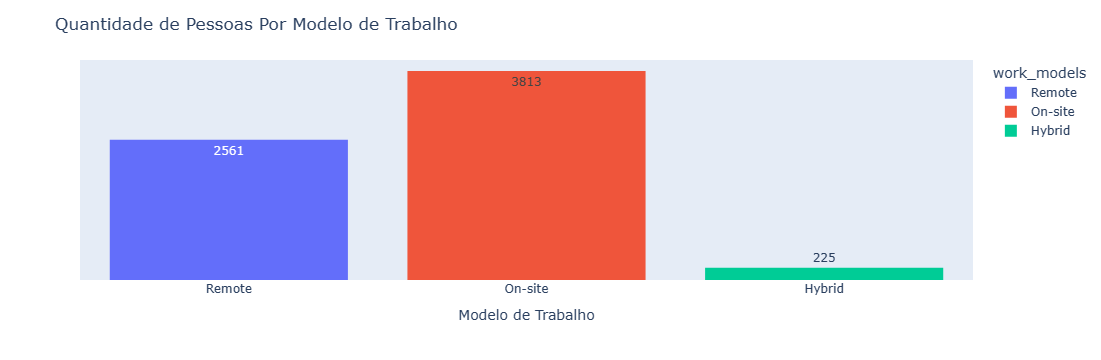

In [17]:
fig = px.histogram(salario, x="work_models",color="work_models")

fig.update_traces(texttemplate='%{y}', textposition='auto')

fig.update_yaxes(visible=False, showticklabels=False)

fig.update_layout(title_text='Quantidade de Pessoas Por Modelo de Trabalho')

fig.update_xaxes(title_text='Modelo de Trabalho')

fig.show()

# O trabalho presencial é o modelo predominante entre as pessoas neste conjunto de dados, sugerindo que ainda é o formato mais comum de arranjo de trabalho.
# O trabalho remoto também é significativamente representado, o que pode refletir uma tendência crescente de flexibilidade no local de trabalho ou a natureza dos empregos dentro deste dataset específico.
# O modelo híbrido é o menos comum, o que pode indicar que menos empresas ou indivíduos têm adotado este modelo.

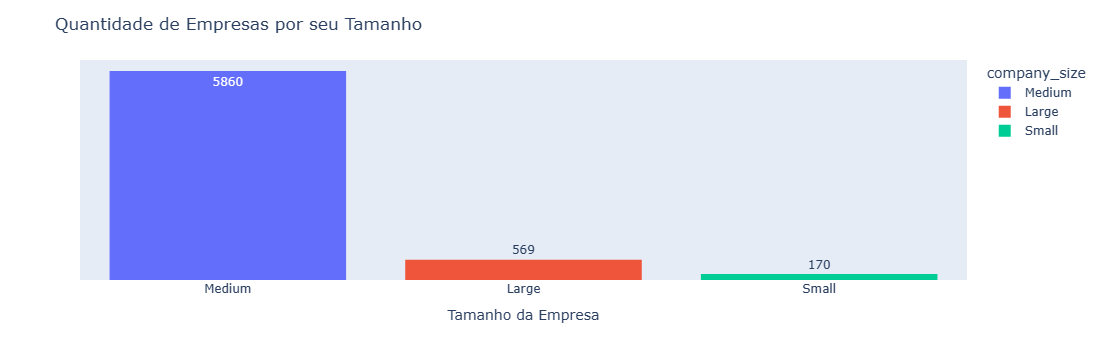

In [18]:
fig = px.histogram(salario, x="company_size",color="company_size")

fig.update_traces(texttemplate='%{y}', textposition='auto')

fig.update_yaxes(visible=False, showticklabels=False)

fig.update_layout(title_text='Quantidade de Empresas por seu Tamanho')

fig.update_xaxes(title_text='Tamanho da Empresa')

fig.show()

# As empresas de tamanho médio são, de longe, as mais comuns neste conjunto de dados, sugerindo que este pode ser o tamanho predominante de empresa no contexto em questão.
# Grandes empresas são menos comuns que as de tamanho médio, mas ainda assim têm uma presença significativa.
# Pequenas empresas são as menos representadas no conjunto de dados, o que pode indicar que têm menos funcionários em geral ou que o dataset não se concentra em empresas de pequeno porte.

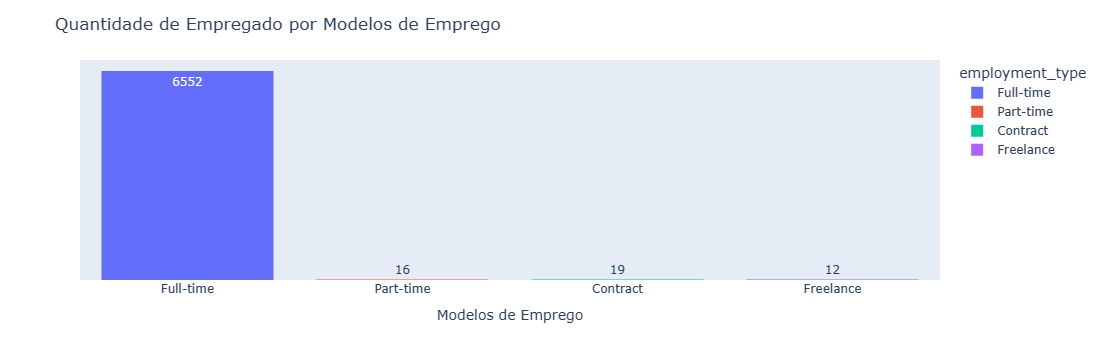

In [19]:
fig = px.histogram(salario, x="employment_type",color="employment_type")

fig.update_traces(texttemplate='%{y}', textposition='auto')

fig.update_yaxes(visible=False, showticklabels=False)

fig.update_layout(title_text='Quantidade de Empregado por Modelos de Emprego ')

fig.update_xaxes(title_text='Modelos de Emprego')

fig.show()


# O emprego em tempo integral é esmagadoramente o tipo mais comum de emprego para as pessoas neste conjunto de dados. Trabalho em meio período, por contrato e como freelancer são muito menos comuns em comparação com o emprego em tempo integral.

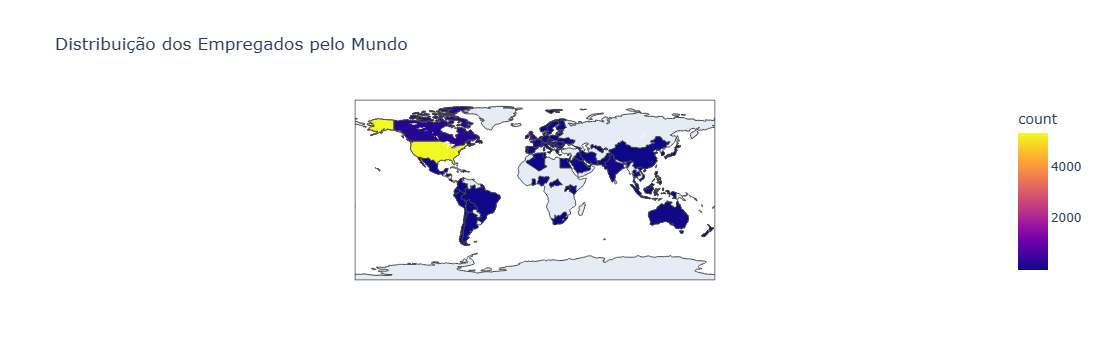

In [20]:
frequencia_paises = salario['employee_residence'].value_counts().reset_index()
frequencia_paises.columns = ['country', 'count']

# Os nomes dos paises estão em um formato diferente, para usar o grafico choropleth, precisamos transformar em sigla, atraves da função country_to_iso3 fazemos isso!
import pycountry

def country_to_iso3(country):
    try:
        return pycountry.countries.lookup(country).alpha_3
    except:
        return None

frequencia_paises['iso_alpha'] = frequencia_paises['country'].apply(country_to_iso3)
frequencia_paises

# Em seguida, você usaria o Plotly Express para criar o mapa de calor geográfico:
fig = px.choropleth(frequencia_paises,
                     locations='iso_alpha',
                     color='count',
                     hover_name='iso_alpha',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Distribuição dos Empregados pelo Mundo')


fig.show()

# O gráfico acima demonstra a variedade e distribuição dos empregados ao redor do mundo.

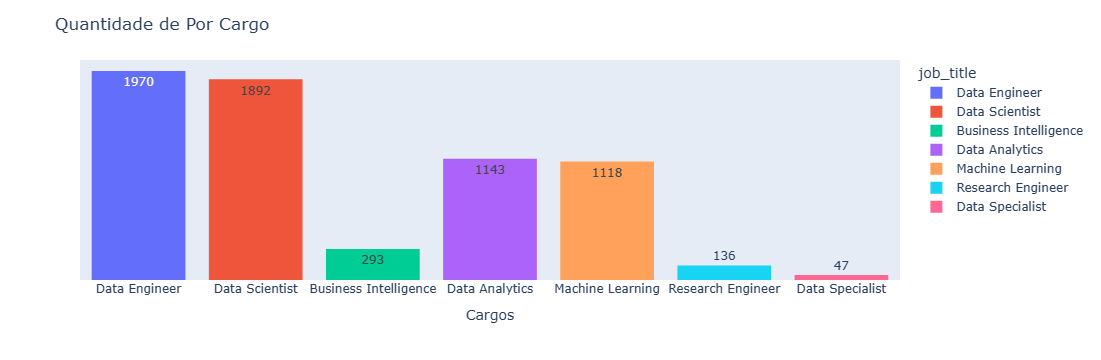

In [21]:
fig = px.histogram(salario_agrupado, x="job_title",color="job_title")

fig.update_traces(texttemplate='%{y}', textposition='auto')

fig.update_yaxes(visible=False, showticklabels=False)

fig.update_layout(title_text='Quantidade de Por Cargo ')

fig.update_xaxes(title_text='Cargos')

fig.show()

# Aqui temos a quantidade de Funcionarios para cada Cargo, Engenheiro de dados sendo o que tem mais funcionarios seguido de Cientista de dados

# **10. Análise Bivariada**

# Para a análise bivariada, acabei optando por excluir salários acima de USD 700k, neste caso, reduzindo o efeito que esses pontos de dados extremos podem ter na análise. Garantindo que as conclusões sejam mais representativas do conjunto de dados como um todo.

In [22]:
salario=salario.query('salary_in_usd<700000')

# **Como os salários na área de ciência de dados mudaram ao longo dos anos de 2020 a 2024?**

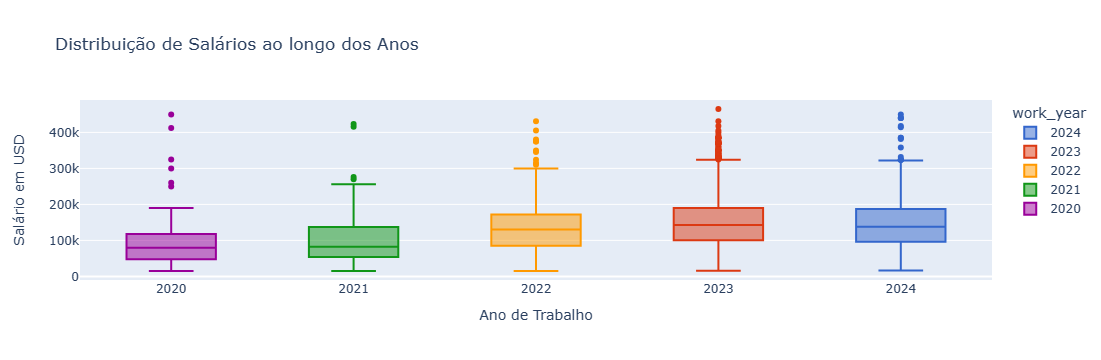

In [23]:
# Agora, vamos criar o boxplot com o Plotly
fig = px.box(salario, x='work_year', y='salary_in_usd', title='Distribuição de Salários ao longo dos Anos',color='work_year',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_yaxes(title_text='Salário em USD')

fig.update_xaxes(title_text='Ano de Trabalho')

fig.show()

# Há uma variação notável na mediana dos salários nos primeiros anos, em comparação com os três últimos, o que pode refletir o amadurecimento da área e o surgimento de cargos com salários mais altos, como o aumento da utilização de Machine Learning e IA na área de dados.
# Outliers são evidentes em cada ano, indicando a presença de salários excepcionalmente altos em comparação com a maioria.
# Para um entendimento mais robusto de como o "work_year" pode afetar a média salarial, poderíamos aplicar um teste de hipóteses. Este teste poderia ser usado para determinar se há diferenças estatisticamente significativas entre as médias salariais dos diferentes anos. Por exemplo, um teste ANOVA (Análise de Variância) seria apropriado se quiséssemos comparar as médias de três ou mais grupos independentes (neste caso, os anos).

# **Tamanho da Empresa Muda o Salario ?**

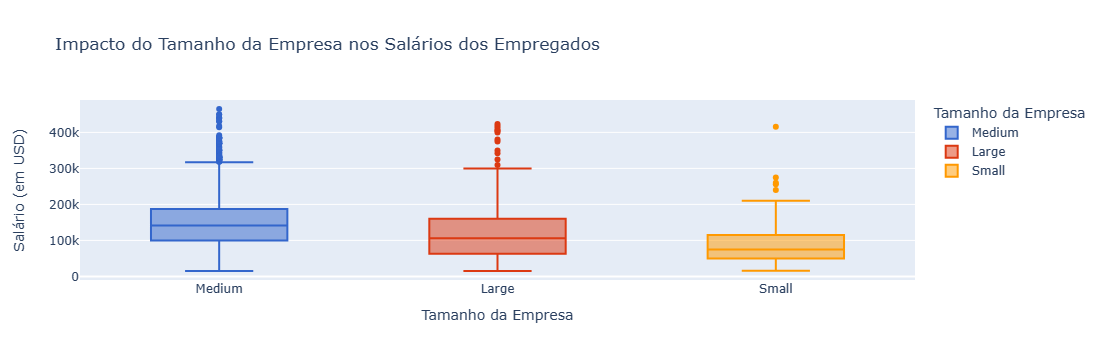

In [24]:
fig = px.box(salario, x='company_size', y='salary_in_usd',
             title='Impacto do Tamanho da Empresa nos Salários dos Empregados',
             labels={'company_size': 'Tamanho da Empresa', 'salary_in_usd': 'Salário (em USD)'},
             color='company_size',color_discrete_sequence=px.colors.qualitative.G10)  # Isso vai colorir as caixas com base no tamanho da empresa


fig.show()

# As empresas de médio porte apresentam a maior mediana salarial em comparação com as de pequeno e grande porte. O que é diferente do que usualmente vemos por aí, pode ser que seja algo específico deste conjunto de dados ou, por exemplo, estas empresas podem ser mais focadas em nichos específicos, exigindo habilidades mais especializadas que comandam salários mais altos. Seria necessário mais informações sobre as empresas para se ter uma confirmação.
# As empresas de grande porte têm uma variação maior de salários, como indicado pelo comprimento da caixa (retângulo vermelho) e pelos "bigodes" que se estendem a partir da caixa, mostrando que a faixa entre o salário mais baixo e o mais alto é ampla. Empresas de pequeno porte têm a menor mediana salarial e a distribuição mais compacta de salários, como mostrado pelo tamanho da caixa (retângulo laranja).
# Para afirmar com segurança que há uma diferença significativa nos salários entre as empresas de diferentes tamanhos, seria necessário realizar um teste de hipótese estatística. Por exemplo, um teste ANOVA poderia ser utilizado para comparar as médias de três ou mais grupos independentes (neste caso, os tamanhos das empresas) e determinar se alguma das diferenças entre as médias é estatisticamente significativa.

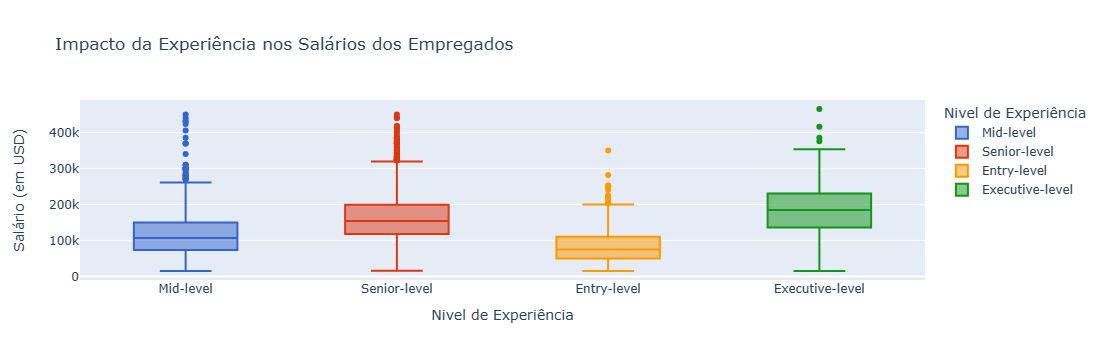

In [25]:
fig = px.box(salario, x='experience_level', y='salary_in_usd',
             title='Impacto da Experiência nos Salários dos Empregados',
             labels={'experience_level': 'Nivel de Experiência', 'salary_in_usd': 'Salário (em USD)'},
             color='experience_level',color_discrete_sequence=px.colors.qualitative.G10)  # Isso vai colorir as caixas com base no tamanho da empresa


fig.show()

# O gráfico BoxPlot acima respeita a diferença de nível profissional da área de tecnologia, indo do nível mais básico "Entry-Level" até o "Executive-Level", tendo um aumento gradativo como é comum nas empresas de tecnologia.
# Para confirmar se as diferenças observadas nos salários são estatisticamente significativas, seriam necessários testes de hipótese. Um teste de hipóteses, como um teste t de amostras independentes ou um teste ANOVA, poderia ser aplicado para determinar se as diferenças nos salários médios entre os diferentes níveis de experiência são maiores do que o que seria esperado pelo acaso.

# **11. Analise Multivariada**

# **Cargos ao Decorrer dos Anos**

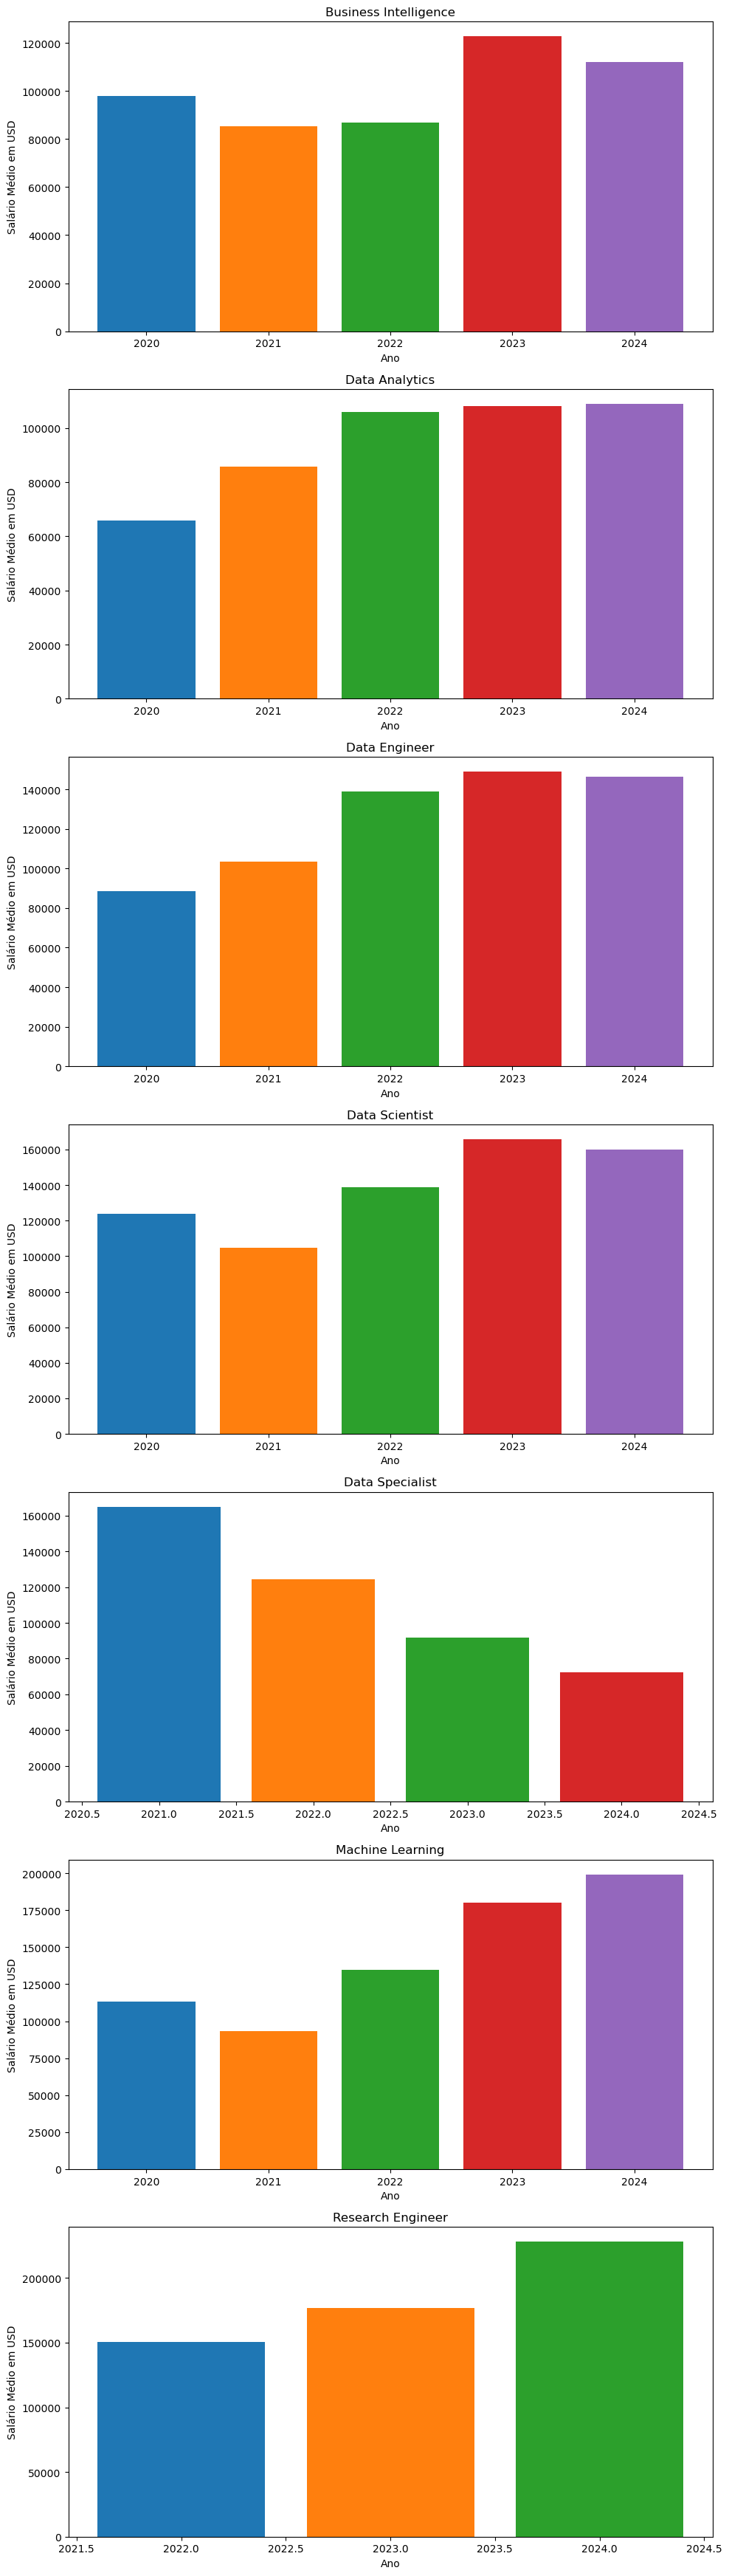

In [26]:
import matplotlib.pyplot as plt

salario_agrupado_ano=salario_agrupado.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()
cargos_unicos = salario_agrupado_ano['job_title'].unique()
n_cargos = len(cargos_unicos)

# Definindo o tamanho do gráfico. Ajuste conforme necessário.
plt.figure(figsize=(10, 5 * n_cargos))

for i, cargo in enumerate(cargos_unicos, start=1):
    plt.subplot(n_cargos, 1, i)
    df_filtrado = salario_agrupado_ano[salario_agrupado_ano['job_title'] == cargo]
    
    # Para cada ano, plote os salários médios
    for ano in sorted(df_filtrado['work_year'].unique()):
        df_ano = df_filtrado[df_filtrado['work_year'] == ano]
        plt.bar(df_ano['work_year'], df_ano['salary_in_usd'], label=str(ano))
    
    plt.title(cargo)
    plt.xlabel('Ano')
    plt.ylabel('Salário Médio em USD')
    plt.legend(title='Ano')

    # Removendo a legenda se desejado
    plt.legend().set_visible(False)

# Ajustando automaticamente o layout dos subplots para evitar sobreposições
plt.tight_layout()
plt.show()


# A partir do gráfico, podemos ver que, em geral, houve um aumento do salário médio ao longo dos anos, o que se deve possivelmente ao amadurecimento da área de dados. Esse aumento é mais acentuado, aparentemente, em cargos envolvendo machine learning e cargos como Research Engineer.
# Note que o salário de "Data Specialist" está decrescendo, o que na verdade é explicado pela falta de dados referentes aos anos.

# **Relação Cargo x Salario em USD**

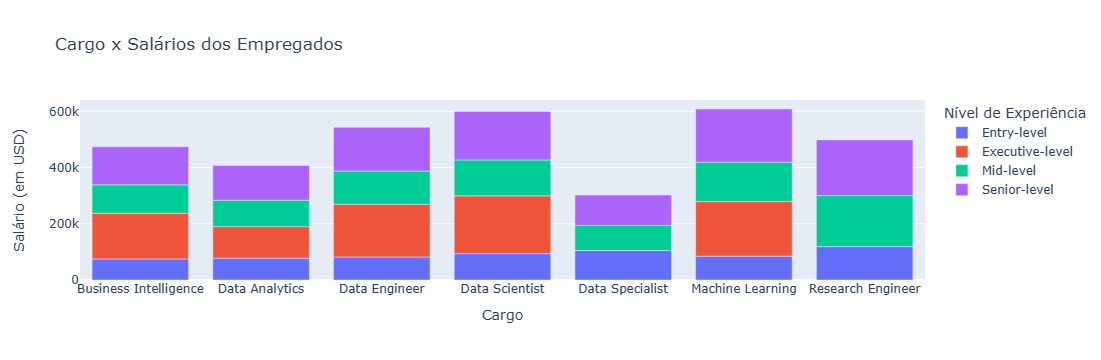

In [27]:
import plotly.express as px
import pandas as pd

salario_agrupado_media = salario_agrupado.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()


fig = px.bar(salario_agrupado_media, x='job_title', y='salary_in_usd',
             color='experience_level',
             title='Cargo x Salários dos Empregados',
             labels={'experience_level': 'Nível de Experiência', 'salary_in_usd': 'Salário (em USD)','job_title':'Cargo'})


fig.show()

# Temos cargos como "Machine Learning" e "Data Scientist" como os que mais ganham em média, seguidos por "Data Engineer" e "Research Engineer".

#  **12.Conclusão**

# Com isso, concluímos nossa EDA para os salários de Data Science entre 2020 e 2024. Para uma análise mais completa e precisa, precisaríamos de um volume maior de dados e uma diversidade que inclua a empresa, a localização da empresa e do funcionário, divisão entre gêneros e idade, entre outros. Isso poderia proporcionar insights mais detalhados sobre as tendências salariais e permitir análises mais específicas, como o impacto da localização geográfica nos salários ou a existência de disparidades salariais de gênero.
# A segmentação detalhada dos cargos ajudaria a esclarecer as nuances entre diferentes funções dentro da área de Data Science e poderia revelar tendências específicas de cada especialização.
# Além disso, os dados têm muitas colunas e há desbalanceamento de classes e de cargos, o que pode enviesar os dados e a análise. Para fins didáticos e da competição, a análise foi realizada.

### Qualquer FeedBack/Dica/Comentario/Sugestão será de grande ajuda !
